In [50]:
import numpy as np
import matplotlib.pyplot as plt
import fitsio
import os
import warnings; warnings.simplefilter('ignore')

from main_def import cut, flux_to_mag

from desitarget.targetmask import desi_mask, bgs_mask 

In [2]:
main_dr7_path = '/global/project/projectdirs/desi/target/catalogs/dr7.1/0.27.0/'
main_dr7_catalogue = 'targets-dr7.1-0.27.0.fits'
df7 = fitsio.read(os.path.join(main_dr7_path, main_dr7_catalogue))

In [8]:
df7S = cut(160, 230, -2,18, df7)

In [11]:
bgs_faint = ((np.uint64(df7S['BGS_TARGET']) & np.uint64(bgs_mask['BGS_FAINT']))!=0)
bgs_bright = ((np.uint64(df7S['BGS_TARGET']) & np.uint64(bgs_mask['BGS_BRIGHT']))!=0)
    
BGS = (bgs_bright) | (bgs_faint)

print(np.sum(bgs_faint), np.sum(bgs_bright), np.sum(BGS))

815189 1218632 2033821


In [23]:
df = np.load('/global/project/projectdirs/desi/users/qmxp55/shared/BGS_cat_2.npy')

In [27]:
CUTOUT = df['CUTS'] != ''
fibmag = flux_to_mag(df['FIBERFLUX_R']/df['MW_TRANSMISSION_R'])

In [29]:
#Apply BRIGHTSTARINBLOB mask to new BGS
briblob = df['BRIGHTSTARINBLOB']

In [42]:
#ignore BS, LG and FMC masks in new BGS
GMT = df['CUTS'] == '1'
FMC = df['CUTS'] == '5'
GMT_FMC = df['CUTS'] == '15'

cuts = (GMT) | (FMC) | (GMT_FMC)
print(np.sum(GMT), np.sum(FMC), np.sum(GMT_FMC), np.sum(cuts))

68886 39721 26231 134838


In [45]:
bgs_ts = ((~CUTOUT) | (cuts)) & (~briblob)

In [56]:
print(np.sum(bgs_ts), np.sum(~CUTOUT))

2033821 1932403


In [46]:
print(np.sum(bgs_ts), np.sum(BGS))

2033821 2033821


In [64]:
#mags from new BGS
rmag_new = flux_to_mag(df['FLUX_R']/df['MW_TRANSMISSION_R'])
gmag_new = flux_to_mag(df['FLUX_G']/df['MW_TRANSMISSION_G'])
zmag_new = flux_to_mag(df['FLUX_Z']/df['MW_TRANSMISSION_Z'])
gr_new = gmag_new - rmag_new
rz_new = rmag_new - zmag_new

#mags from old BGS
rmag_old = flux_to_mag(df7S['FLUX_R']/df7S['MW_TRANSMISSION_R'])
gmag_old = flux_to_mag(df7S['FLUX_G']/df7S['MW_TRANSMISSION_G'])
zmag_old = flux_to_mag(df7S['FLUX_Z']/df7S['MW_TRANSMISSION_Z'])
gr_old = gmag_old - rmag_old
rz_old = rmag_old - zmag_old

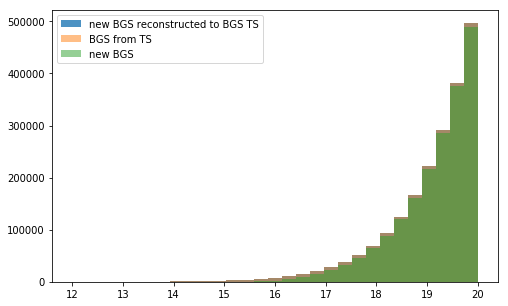

In [63]:
bins = np.linspace(12, 20, 30)
plt.figure(figsize=(8,5))

plt.hist(rmag_new[bgs_ts], alpha=0.8, bins=bins, label='new BGS reconstructed to BGS TS')
plt.hist(rmag_old[BGS], alpha=0.5, bins=bins, label='BGS from TS')
plt.hist(rmag_new[~CUTOUT], alpha=0.5, bins=bins, label='new BGS')

plt.legend()

plt.show()

(-1, 3)

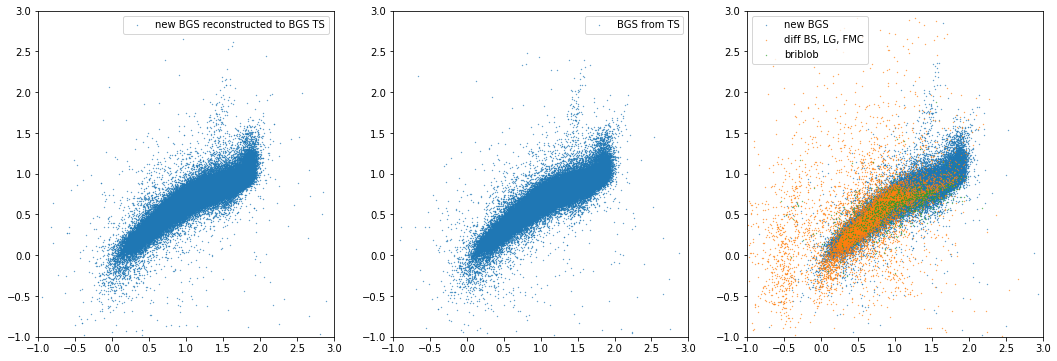

In [74]:
plt.figure(figsize=(18,6))

plt.subplot(1, 3, 1)
plt.scatter(gr_new[bgs_ts][::10], rz_new[bgs_ts][::10], s=.1, label='new BGS reconstructed to BGS TS')
plt.legend()
plt.xlim(-1, 3)
plt.ylim(-1, 3)

plt.subplot(1, 3, 2)
plt.scatter(gr_old[BGS][::10], rz_old[BGS][::10], s=.1, label='BGS from TS')
plt.legend()
plt.xlim(-1, 3)
plt.ylim(-1, 3)

plt.subplot(1, 3, 3)
plt.scatter(gr_new[~CUTOUT][::10], rz_new[~CUTOUT][::10], s=.1, label='new BGS')
plt.scatter(gr_new[cuts][::10], rz_new[cuts][::10], s=.1, label='diff BS, LG, FMC')
plt.scatter(gr_new[~CUTOUT & briblob][::10], rz_new[~CUTOUT & briblob][::10], s=.1, label='briblob')
plt.legend()
plt.xlim(-1, 3)
plt.ylim(-1, 3)
